# Dog Breed Classifier

## Project

I always wanted to build a model that could be used by anyone. *'Tell me what type of dog it is'* is a simple idea that could be made into an app. It would tell you the type of dog on a picture or... the one that you resemble. The main problem is to build a classifier strong enough to work not only with clean and prepared data, but with more diverse one like user made photos.

Here I'm going to build a model for it. I will use a convolutional neural network (CNN), a network type doing really well with image recognition. First, I'm going to use pre-trained models to know if it is an image of a dog or a human. Then I will use a CNN to predict the matching breed. You will see me building two CNNs, one from scratch and the other one using transfer learning. I'm curious how they will compare.

## Imports

In [1]:
import numpy as np
from glob import glob
from tqdm import tqdm

import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline

## Load data

The data are images of famous people and different types of dogs.

In [2]:
# load filenames for human and dog images
human_files = np.array(glob('./data/lfw/*/*'))
dog_files = np.array(glob('./data/dog_images/*/*/*'))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


## Identify humans

As a first step I want the application to know whether it is dealing with a dog or a human image. I'm going to use a pre-trained classifier, namely [Haar Cascades](https://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) from OpenCV. It has a a number of detectors that you can use with it. I've download one of them from [gihub](https://github.com/opencv/opencv/tree/master/data/haarcascades). It is stored as XML file.

Let's apply it to an image and see how it works.

Number of faces detected: 1


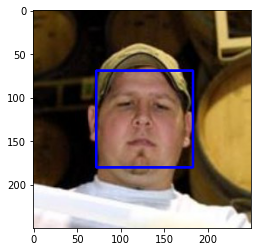

In [3]:
# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('./haar_cascade/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image using face_cascade model
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

I start with converting an image to grayscale so the classifier can work with it. Then I obtain the result and keep it in `faces`. It is a 1D array with 4 elements, `x`, `y`, `w` and `h`. Basically what the algorithm does is it finds a rectangle with a face. It's left corner is given by `x`, `y` and its size is given by `w` and `h`.

### Human face detector

Here is a simple function to tell whether there is a human on a pic.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### Test it

Let's test this classifier on a hundred dog and human images. Ideally, you would expect it to score 0% on dogs and 100% on people.

In [5]:
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

# returns the ratio of human faces detected on the image list
def human_face_ratio(img_path_list):    
    detection = [face_detector(img_path) for img_path in tqdm(img_path_list, desc = 'Detecting human faces')]
    return sum(detection) / len(detection)

## test the performance of the face_detector algorithm
print('Ratio of human faces detected in human images:', human_face_ratio(human_files_short))
print('Ratio of human faces detected in dog images:', human_face_ratio(dog_files_short))

Detecting human faces:   0%|          | 0/100 [00:00<?, ?it/s]

Ratio of human faces detected in human images: 0.99


Detecting human faces: 100%|██████████| 100/100 [00:08<00:00, 11.15it/s]

Ratio of human faces detected in dog images: 0.16


The results seem very acceptable. It looks like the algorithm is almost always right with images of people. When it comes to dog pictures, it recognizes a face quite rarely at only 16% of them.